In [128]:
import sympy as sp
import numpy as np
import keras
X=np.loadtxt('/home/djc6w/S20-team4-project/src/train.csv', delimiter = ',')
X=X.astype('float32')
Y=np.loadtxt('/home/djc6w/S20-team4-project/src/test.csv', delimiter = ',')
Y=Y.astype('float32')

In [129]:
print(X.shape)
print(Y.shape)

(2936, 81)
(2936, 81)


In [130]:
x_train = np.zeros((X.shape[0],9,9,1))
for i in range(X.shape[0]):
    x_train[i,:,:,0] = X[i].reshape(9,9)
y_train = Y

In [131]:
display(x_train.shape)
display(y_train.shape)

(2936, 9, 9, 1)

(2936, 81)

In [132]:
display(sp.Matrix(x_train[24,:,:,0]))
display(sp.Matrix(y_train[24].reshape(9,9)))
x_train.shape

Matrix([
[               0.0,                0.0,                0.0,                0.0,                0.0,                0.0, -0.100000001490116,                1.0, -0.100000001490116],
[               0.0,                0.0,                0.0, -0.100000001490116, -0.200000002980232, -0.200000002980232, -0.200000002980232, -0.100000001490116, -0.100000001490116],
[-0.100000001490116, -0.100000001490116,                0.0, -0.100000001490116,                1.0,                1.0, -0.100000001490116, -0.100000001490116,                1.0],
[               1.0, -0.200000002980232, -0.100000001490116, -0.200000002980232,                1.0,                1.0,                1.0,                1.0,                1.0],
[               1.0,                1.0,                1.0,                1.0,                1.0,                1.0,                1.0,                1.0,                1.0],
[               1.0,                1.0,                1.0,                1.0, 

Matrix([
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -0.1, -1.0, -0.1],
[ 0.0,  0.0,  0.0, -0.1, -0.2, -0.2, -0.2, -0.1, -0.1],
[-0.1, -0.1,  0.0, -0.1, -1.0, -1.0, -0.1, -0.1, -0.1],
[-1.0, -0.2, -0.1, -0.2, -0.2, -0.2, -0.1, -0.1, -1.0],
[-0.1, -0.2, -1.0, -0.1,  0.0,  0.0,  0.0, -0.2, -0.2],
[-0.1, -0.2, -0.1, -0.1,  0.0,  0.0, -0.1, -0.2, -1.0],
[-1.0, -0.1,  0.0,  0.0,  0.0,  0.0, -0.1, -1.0, -0.2],
[-0.1, -0.1,  0.0,  0.0, -0.1, -0.1, -0.2, -0.1, -0.1],
[ 0.0,  0.0,  0.0,  0.0, -0.1, -1.0, -0.1,  0.0,  0.0]])

(2936, 9, 9, 1)

In [142]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(12, kernel_size=(5,5),
                              activation = 'tanh',
                              data_format='channels_last',
                              input_shape=[x_train.shape[1],
                                          x_train.shape[2],
                                          x_train.shape[3]]))
model.add(keras.layers.Conv2D(18,(3,3),activation='tanh'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(162, activation='tanh'))
model.add(keras.layers.Dense(123, activation='tanh'))
model.add(keras.layers.Dense(81, activation='tanh'))

model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 5, 5, 12)          312       
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 3, 3, 18)          1962      
_________________________________________________________________
flatten_26 (Flatten)         (None, 162)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 162)               26406     
_________________________________________________________________
dense_65 (Dense)             (None, 123)               20049     
_________________________________________________________________
dense_66 (Dense)             (None, 81)                10044     
Total params: 58,773
Trainable params: 58,773
Non-trainable params: 0
_________________________________________________

In [145]:
batch_size = 1
epochs = 75
history = model.fit(x_train,y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=0)

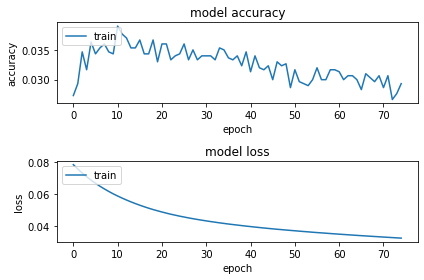

In [146]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(211)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'], loc='upper left')

plt.tight_layout()
plt.show()

In [123]:
sp.Matrix(x_train[0,:,:,0])

Matrix([
[               0.0,                0.0, -0.100000001490116, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[               0.0, -0.100000001490116, -0.200000002980232, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[-0.100000001490116, -0.200000002980232,                1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[               1.0,                1.0,                1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[               1.0,                1.0,                1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[               1.0,                1.0,                1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[               1.0,                1.0,                1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[               1.0,                1.0,                1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[               1.0,                1.0,                1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])

In [122]:
preds = model.predict(x_train[0:1,:,:,:]).astype("float32")
display(sp.Matrix(preds.reshape(9,9)))
display(sp.Matrix(y_train[8].reshape(9,9)))

Matrix([
[ -0.239925, -0.0972286, -0.155514, -0.234172,  -0.124876, -0.0695136, -0.0367796,  -0.0964941, -0.0841551],
[ 0.0667097, -0.0510283, -0.166075, -0.623892,   -0.35142, -0.0567252,  0.0215617,   0.0247414,  -0.186853],
[-0.0386612, -0.0973796, -0.479644, -0.554819,  -0.648375,  -0.245321,  0.0294114,  -0.0423898,  -0.159279],
[ -0.281397,  -0.549596, -0.151816, -0.372966,  -0.114746,  -0.458818,   -0.24004,   -0.255932,  -0.418754],
[  -0.06307,  -0.221863, -0.232172, -0.107607,  -0.243642, -0.0931583,   -0.38359,   -0.226523,  -0.102435],
[-0.0637133,  -0.137557, -0.295134,  -0.20824,  -0.195798,  -0.478125,  -0.200795, -0.00151409,  -0.136496],
[ -0.479021,  -0.343132, -0.436693, -0.390716,  -0.316678,  -0.222308,  -0.116906,   0.0183631,  0.0122297],
[ -0.366413,  -0.436459, -0.301127,  -0.43206, -0.0246958,  -0.175519,  -0.320527,  -0.0175348,  0.0875976],
[-0.0888306,  -0.261412, -0.128123, -0.158913, -0.0800022,  -0.426423, -0.0399937,     0.15925,  -0.259733]])

Matrix([
[ 0.0,  0.0, -0.1, -0.1, -0.1,  0.0,  0.0, -0.1, -0.1],
[ 0.0, -0.1, -0.2, -1.0, -0.1,  0.0,  0.0, -0.1, -1.0],
[-0.1, -0.2, -1.0, -0.2, -0.1,  0.0,  0.0, -0.1, -0.1],
[-0.1, -1.0, -0.2, -0.1,  0.0,  0.0,  0.0,  0.0,  0.0],
[-0.1, -0.1, -0.1,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-0.1, -0.2, -0.2, -0.2, -0.2, -0.1, -0.1,  0.0,  0.0],
[-1.0, -0.3, -1.0, -1.0, -0.3, -1.0, -0.1,  0.0,  0.0],
[-0.2, -1.0, -0.4, -1.0, -0.3, -0.1, -0.1,  0.0,  0.0],
[-0.1, -0.1, -0.2, -0.1, -0.1,  0.0,  0.0,  0.0,  0.0]])